## Personal loan Campaign 
#This case is about a bank (Thera Bank) which has a growing customer
base. Majority of these customers are liability customers (depositors) with
varying size of deposits. The number of customers who are also borrowers
(asset customers) is quite small, and the bank is interested in expanding
this base rapidly to bring in more loan business and in the process, earn
more through interest on loans. In particular, the management wants to
explore ways of converting its liability customers to personal loan
customers (while retaining them as depositors). A campaign that the bank
ran last year for liability customers showed a healthy conversion rate of
over 9% success. This has encouraged the retail marketing department to
devise campaigns with better target marketing to increase the success ratio
with minimal budget.
The department wants to build a model that will help them identify the
potential customers who have a higher probability of purchasing the loan.
This will increase the success ratio while at the same time reduce the cost
of the campaign.

In [9]:
#1:Importing required libraries and read the dataset.

In [11]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline
# Numerical libraries
import numpy as np
# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression
# to handle data in form of rows and columns
import pandas as pd 
# importing plotting libraries
import matplotlib.pyplot as plt 
#importing seaborn for statistical plots
import seaborn as sns
# Importing Logistic Libraries 
from sklearn.linear_model import LogisticRegression
#Sklearn package's data splitting function which is based on random function
from sklearn.model_selection import train_test_split
# calculate accuracy measures and confusion matrix
from sklearn import metrics
# To scale the dimensions we need scale function which is part of sckikit preprocessing libraries
from sklearn import preprocessing

#2:Checking the shape and info of the dataset.

In [12]:
# reading the CSV file into pandas dataframe
bld_df_org = pd.read_csv("Bank_Personal_Loan_Modelling-1.csv")
bld_df = bld_df_org
bld_df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [13]:
# drop the ID, ZIPCODE column as they may not be useful for the model
bld_df = bld_df.drop('ID', axis=1)
bld_df = bld_df.drop('ZIP Code', axis=1)
bld_df

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1,1.9,3,0,0,0,0,1,0
4996,30,4,15,4,0.4,1,85,0,0,0,1,0
4997,63,39,24,2,0.3,3,0,0,0,0,0,0
4998,65,40,49,3,0.5,2,0,0,0,0,1,0


In [14]:
bld_df.shape

(5000, 12)

In [15]:
bld_df.size

60000

In [16]:
bld_df.isnull().sum()

Age                   0
Experience            0
Income                0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [17]:
bld_df.dtypes

Age                     int64
Experience              int64
Income                  int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [18]:
bld_df.groupby('Personal Loan').count()


,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,,
0,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520
1,480,480,480,480,480,480,480,480,480,480,480


#4:Using describe function to get summary of data.

In [19]:
#Describing the data
bld_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0
CD Account,5000.0,0.060400,0.238250,0.0,0.0,0.0,0.0,1.0


#Findings based on the summary:

#1. There are no Null Values in the data set.

#2. All Attributes are of Data Type Int or Float No String Values

#4. Family & Education are cardinal variables and columns needs to be splinted

#5. ID, ZIP Code columns are not required for the Analysis hence they were dropped from the Data Frame.

#6. Income and Mortgage are having More Mean than Median so Mean falls right of Median shows un even distribution # and having skewness towards right side.

#7 Rest of the columns are having almost normal distribution.

#4: Studying the data distribution in each attribute.

C:\Users\home\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\home\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\home\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


<Figure size 360x216 with 0 Axes>

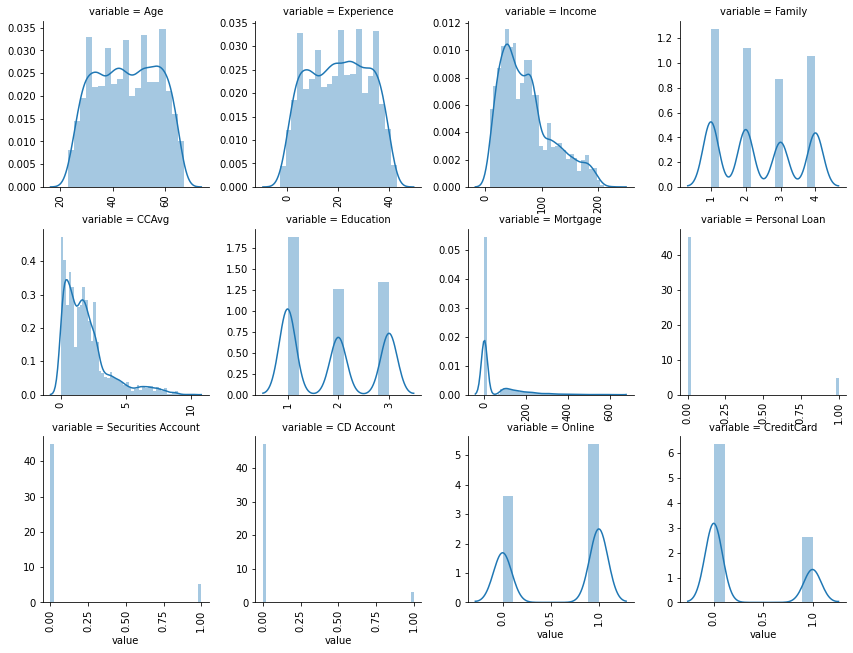

In [20]:
#getting the Data Distibution for each of the attribute
numerical_features = ['Age','Experience','Income','Family','CCAvg','Education','Mortgage','Personal Loan','Securities Account','CD Account','Online','CreditCard']
nd = pd.melt(bld_df, value_vars = numerical_features)
plt.figure(figsize = (5,3))
plot = sns.FacetGrid (nd, col='variable', col_wrap=4, sharex=False, sharey = False)
plot = plot.map(sns.distplot, 'value')
for ax in plot.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(90)

#Findings on Data Distribution of each Attribute:

#Attribute - Type 
#1. Continuous Variables - Age, Experience, Income.
#2. Categorical/Discrete CCAvg, Education, Mortgage, Personal Loan, Securities Account, CD Account, Online and CreditCard.
#3. Age ,Experience, Income are having normal distribution.
#4. CC Avg and Mortgage are having Left Skewness may be having outliers.
#4 Categorical Variables are to be split into different columns.

#5: Getting the target column distribution.

C:\Users\home\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


<Figure size 360x216 with 0 Axes>

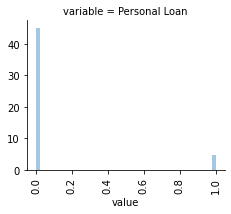

In [21]:
numerical_features = ['Personal Loan']
nd = pd.melt(bld_df, value_vars = numerical_features)
plt.figure(figsize = (5,3))
plot = sns.FacetGrid (nd, col='variable', col_wrap=4, sharex=False, sharey = False)
plot = plot.map(sns.distplot, 'value')
for ax in plot.axes.flat:
        for label in ax.get_xticklabels():
            label.set_rotation(90)

#Findings on Data Distribution of Target Column:
#Personal Loan is the target column and Its a discrete variable.
#Very less people are opted for Personal loan and sample will be enough to predict the target variable
#Only 480 were took Personal loan 4520 were not opted for Personal Loan.

In [22]:
# Split Categorical variables
bld_df = pd.get_dummies(bld_df, columns=['Family'])
bld_df = pd.get_dummies(bld_df, columns=['Education'])
bld_df

,Age,Experience,Income,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Family_1,Family_2,Family_3,Family_4,Education_1,Education_2,Education_3
0,25,1,49,1.6,0,0,1,0,0,0,0,0,0,1,1,0,0
1,45,19,34,1.5,0,0,1,0,0,0,0,0,1,0,1,0,0
2,39,15,11,1.0,0,0,0,0,0,0,1,0,0,0,1,0,0
3,35,9,100,2.7,0,0,0,0,0,0,1,0,0,0,0,1,0
4,35,8,45,1.0,0,0,0,0,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1.9,0,0,0,0,1,0,1,0,0,0,0,0,1
4996,30,4,15,0.4,85,0,0,0,1,0,0,0,0,1,1,0,0
4997,63,39,24,0.3,0,0,0,0,0,0,0,1,0,0,0,0,1
4998,65,40,49,0.5,0,0,0,0,1,0,0,0,1,0,0,1,0


In [23]:
#6:Doing Bivariate analysis.

C:\Users\home\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\home\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\home\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\home\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\home\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


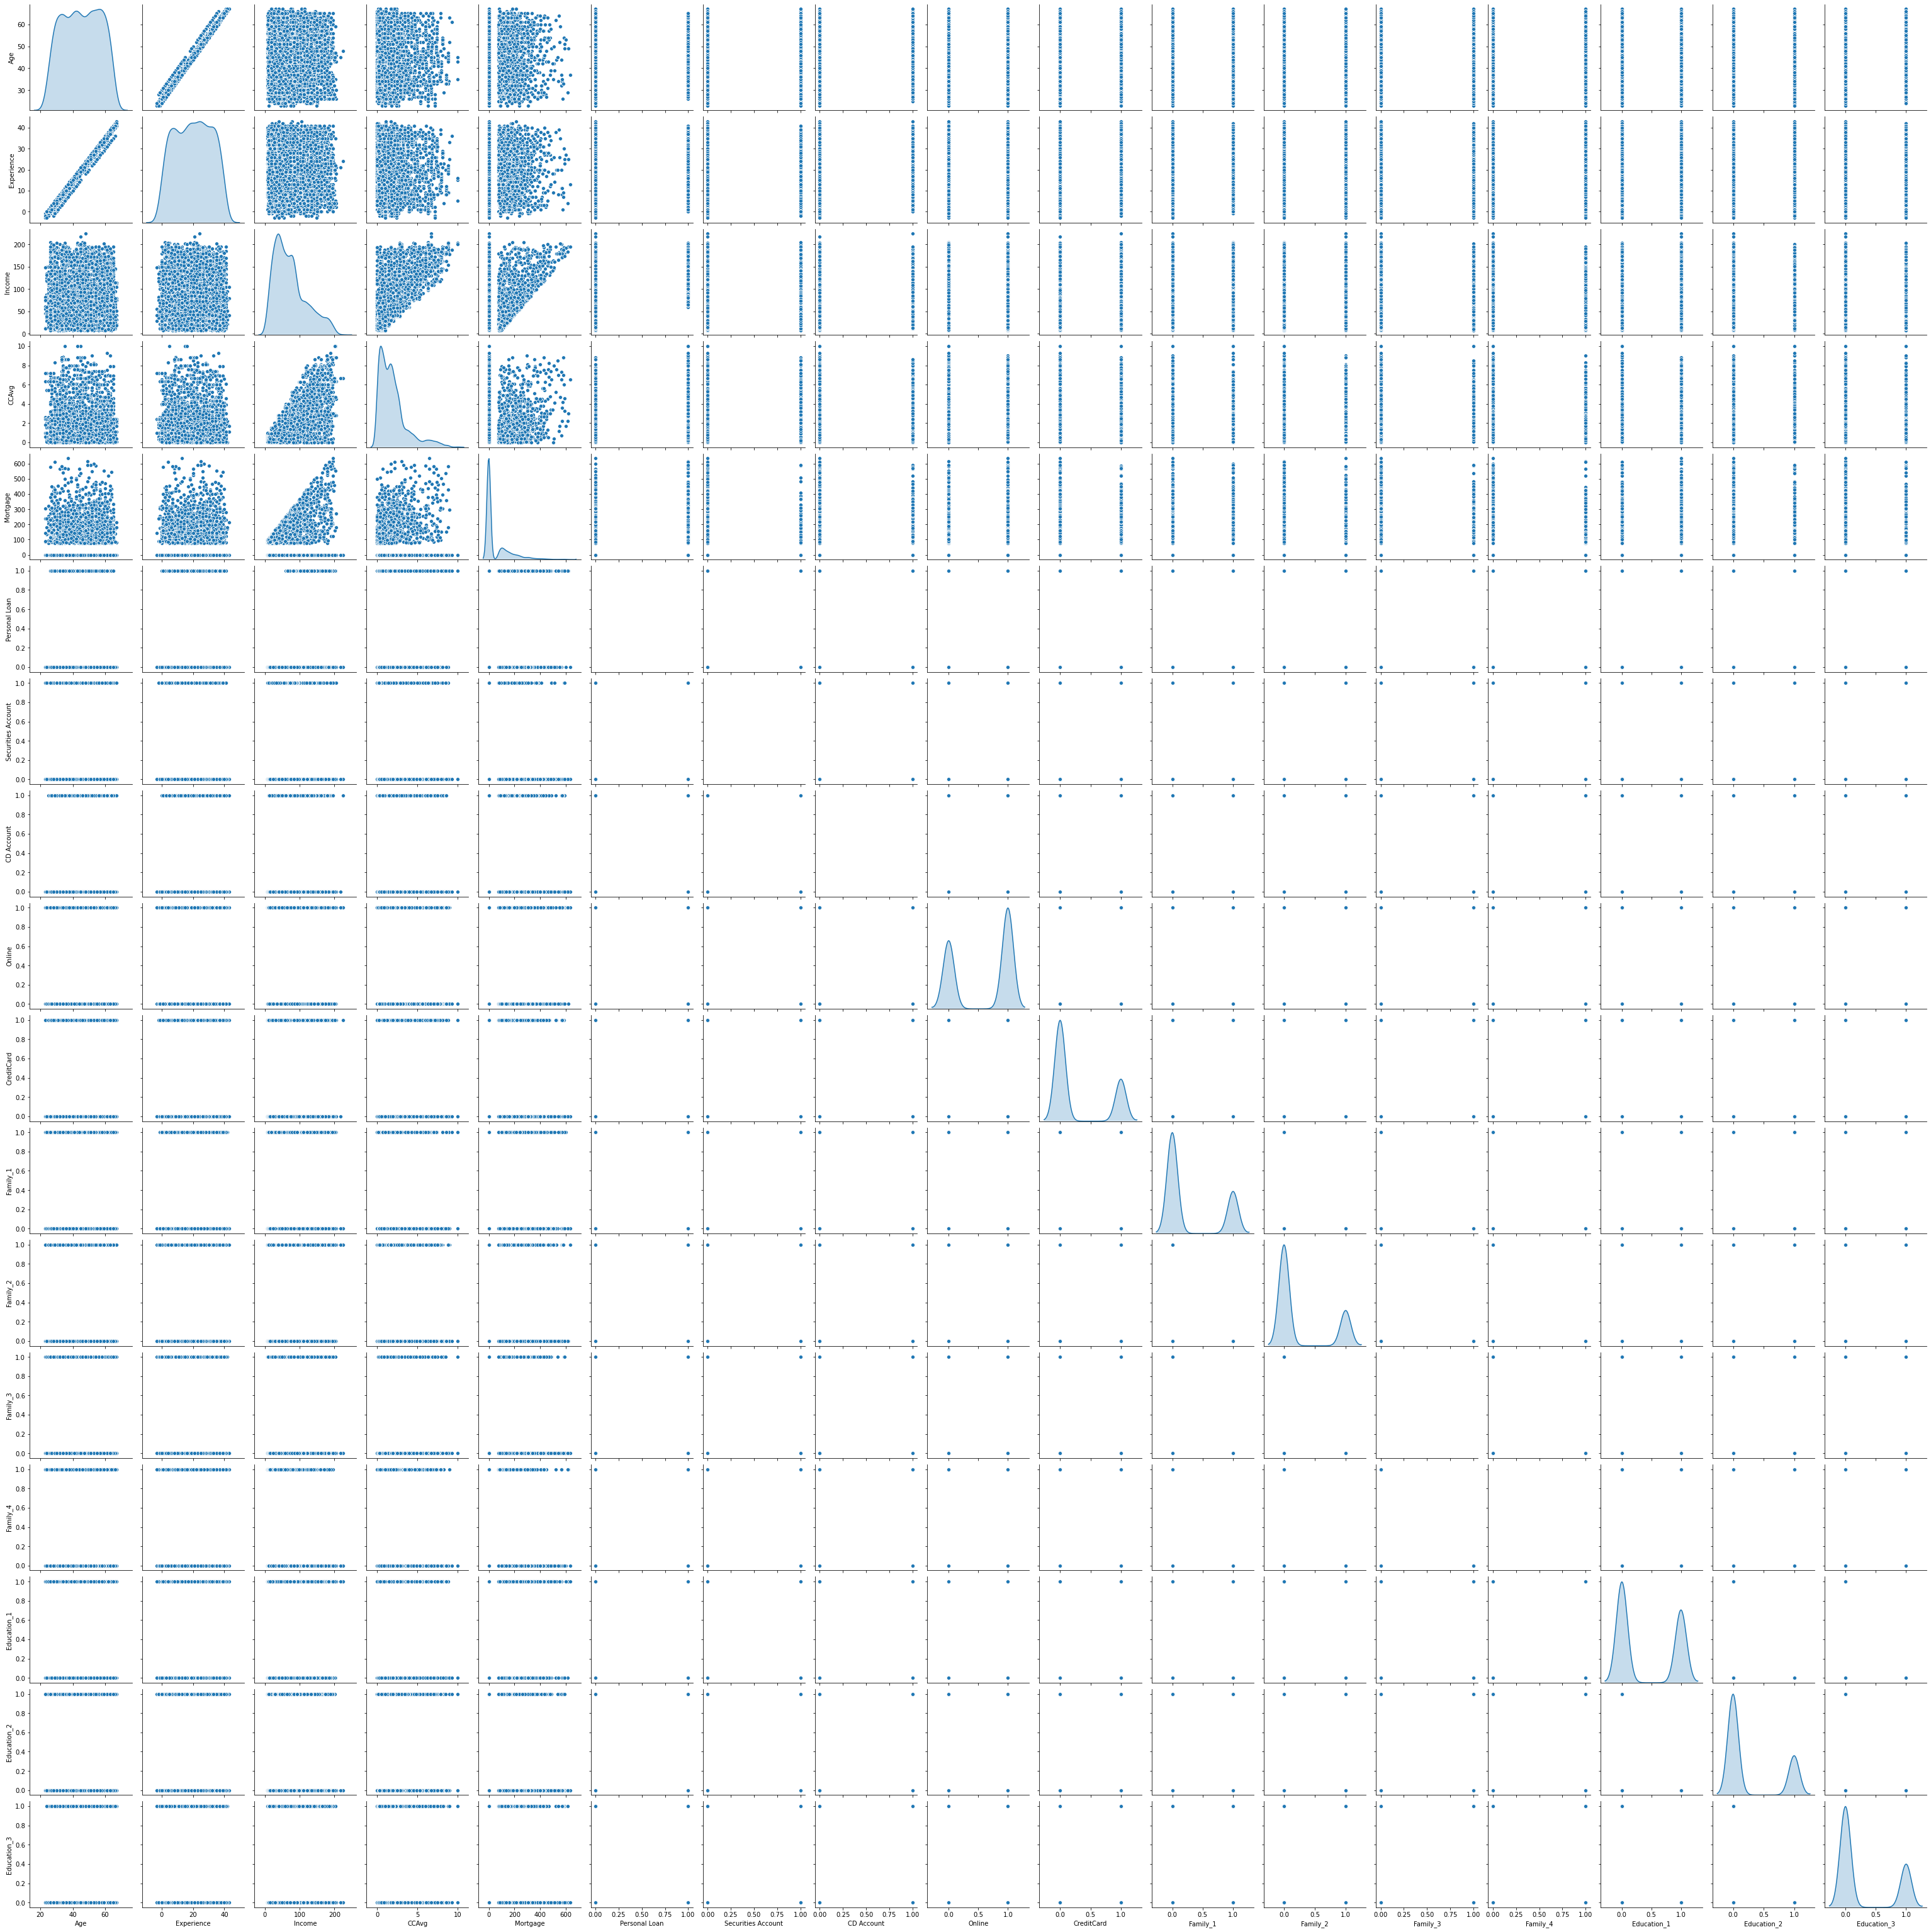

In [24]:
# The Bivariate/correlation analysis among the different dimensions and also each dimension with the dependent dimension
# This is done using scatter matrix function which creates a dashboard reflecting useful information about the dimensions
# The result can be stored as a .png file and opened in say, paint to get a larger view
bld_df_attr = bld_df.iloc[:, 0:17]
sns.pairplot(bld_df_attr, diag_kind='kde') # To plot density curve instead of histogram

#Inference on Bivariate Analysis:
#1.In Principle Diagnol of the above graph shows two peaks/curves shows better two have 2 differnet models.
#2. Relationship:
Personal Loan	-	Target variable
Relation with other Attributes:		
Age	-	Linear Relation
Experience	-	Linear Relation
Income	-	Linear Relation
CCAvg	-	Linear Relation
Mortgage	-	Linear Relation
Securities Account	-	Linear Relation
CD Account	-	Independent & No Impact
Online	-	Independent & No Impact
CreditCard	-	Independent & No Impact
Family_1	-	Independent & No Impact
Family_2	-	Independent & No Impact
Family_3	-	Independent & No Impact
Family_4	-	Independent & No Impact
Education_1	-	Independent & No Impact
Education	-	Independent & No Impact
#3. Less Linear nature between Target and other variables.

#7:Taking absolute values of experience for further analysis.

#1. As the data is not in linear nature the value the final Logistic Regression model to predict the likelihood of a liability customer buying personal loans may not predict properly.
#2. use of Logit method may give much performance of the model.
#3. The below Attributes will have more influence on purchasing home loan:
Age
Experience
Income
CCAvg
Mortgage
#4. Some of the attributes look like they may have an exponential distribution

#9: Splitting the data into training and test set in the ratio of 70:30 respectively.

In [25]:
#Split the data into X and y as training and test set in 70:30 ratio.
# Copy all the predictor variables into X dataframe. And Target variable 'Personal Loan' to y
X = bld_df.drop('Personal Loan', axis=1)
y = bld_df[['Personal Loan']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=50)

In [26]:
X_train.shape

(3500, 16)

In [27]:
X_test.shape

(1500, 16)

In [28]:
y_train.shape

(3500, 1)

In [29]:
y_test.shape

(1500, 1)

#9. Building a Logistic Regression model to predict the likelihood of a liability
#customer buying personal loans

In [30]:
#Logistic Regression Model building
model = LogisticRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
t = list(X_train.columns)
coef_df = pd.DataFrame(model.coef_, columns= t)
coef_df['intercept'] = model.intercept_
print(coef_df)

C:\Users\home\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


        Age  Experience    Income     CCAvg  Mortgage  Securities Account  \
0 -0.354634    0.353288  0.065196  0.159069  0.000901           -0.200145   

   CD Account    Online  CreditCard  Family_1  Family_2  Family_3  Family_4  \
0    3.145287 -0.465596   -0.897664 -0.761703 -1.295737  1.157564  0.517463   

   Education_1  Education_2  Education_3  intercept  
0    -3.064985     1.200816     1.481754  -0.407365  


C:\Users\home\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#10. Printing the confusion matrix for the model.

In [31]:
#Confusion Matrix for the data
print(metrics.confusion_matrix(y_test, y_predict))

[[1345   13]
 [  48   94]]


#True Positives (TP): we correctly predicted that customer don't buying personal loans 1349
#True Negatives (TN): we correctly predicted that customer buying personal loans: 9
#False Positives (FP): we incorrectly predicted that customer don't buying personal loans (Type I error): 50
#False Negatives (FN): we incorrectly predicted that customer buying personal loans (Type II error):92

                    Predicted No	Predicted Yes
"0" Class	1358	1349 (TN)	         9 (FP)
"1" Class	144	      52 (FN)	        92 (TP)
		            1401	           101


Precission:
For Non Personal Loan Class: TP/(TP+FP) = 1349/(1349+9) = 96.28%
For  Personal Loan Class: TP/(TP+FP) = 92/(92+52) = 63.88%
Recall:
For Non Personal Loan Class: TP/(TP+FN) = 1349/(1349+52)=96.22%
For Personal Loan Class: TP/(TP+FN) =  92/(9+92)=91.08%
Accuracy:(TP+TN)/(TP+TN+FP+FN)= 96.06%
F1 Score: 2.(Precission-Recall)/(Precission+Recall)= 35.10%

#11.Printing model score for both train and test data.

In [32]:
## model_Train_score = model.score(X_train, y_train)
print("Train_Score: ",model_Train_score)
model_Test_score = model.score(X_test, y_test)
print("Test_Score: ", model_Test_score)

NameError: name 'model_Train_score' is not defined

#12.Printing classification report.

In [ ]:
print(coef_df)
print("Train_Score: ",model_Train_score)
print("Test_Score: ", model_Test_score)

#z=-0.28Age + 0.28Experience + 0.06Income + 0.16CCAvg + 0.01Mortgage - 0.72Securities Account + 3.26CD Account -  0.41Online - 0.91CreditCard - 0.97Family_1 - 1.35Family_2 + 0.72Family_3 + 0.31Family_4 - 3.08Education_1 + 0.72Education_2 + 1.05Education_3 - 1.30
#Pridction Probability =  1/(1+e^-z)
#Train_Score:  96.2%
#Test_Score: 96.07%
#Accuracy is 9.06%
#Precission for Laon Calss is predicting with less accuracy